In [2]:
import pandas as pd
import numpy as np
import os,glob
from matplotlib import pyplot as plt

In [8]:
def modify_topics(t):
    ''' 
    Create a field/column with a list of the topics for that talk
    
    Modify the topics csv so that the title of the Talk will be split into the appropriate dates
    
    create a one hot encoding for the topics
    - so it becomes easy to search for specific topics, or topics for specific speakers
    '''
    # just remove the NaN 
    # topics_columns = t.fillna(0).iloc[:,range(1,24)].values
    topics_columns = t.fillna(0).iloc[:,1:].values
    topics_columns = [[x for x in row if x != 0] for row in topics_columns]
    t['topic_lists'] = topics_columns
    
    colon = np.array([x[-8] == ':' for x in t[t.columns[0]]])
    assert (colon.astype(int).sum() / t.shape[0]) == 1.0,'there are places where the colon isnt the -8th element in string'
    t['Title'] = [x[:-8] for x in t[t.columns[0]]]
    t['Year'] = [int(x[-7:-3]) for x in t[t.columns[0]]]
    t['Month'] = [int(x[-2:]) for x in t[t.columns[0]]]
    
    #create one hot encoding for topics
    # this was a really fast process
    all_topics = set()
    for i in range(0,23):
        all_topics = all_topics.union(set(t[str(i)].unique()))
    #print(len(all_topics))
    all_topics.remove(np.nan)
    #print(len(all_topics))
    z = np.zeros((t.shape[0],len(all_topics)))
    Z = pd.DataFrame(z,columns = sorted(list(all_topics)))
    #print(t.shape,Z.shape)
    t = pd.concat([t,Z],axis=1)
    #print(t.shape)
    
    # my algorithm for the one hot encoding will be to iterate through the rows, 
    #an for the list of topics for that row to add on in the appropriate column
    # this ran in just a few seconds
    column_names = list(t.columns)
    for i in range(t.shape[0]):
        individual_topics = t.iloc[i]['topic_lists']
        for topic in individual_topics:
            t.iloc[i,column_names.index(topic)] += 1
            
    #note that temples and temple have the exact same talks associate, so it's useless to keep both
    t.drop(columns='temples',inplace=True)
            
    return t
    

In [9]:
#t for topics
t = pd.read_csv('../data/topic_data.csv')
print(t.shape)
#print(t.columns)
t = modify_topics(t)
print('t shape after one hot encoding topics',t.shape)
t.tail(3)

(3692, 24)
t shape after one hot encoding topics (3692, 327)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,wisdom,womanhood,women,work,worldliness,worship,worthiness,young adults,young single adults,youth
3689,Boys Need Men:1974/04,fatherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3690,Selflessness: A Pattern for Happiness:1985/04,generosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3691,“A Meaningful Celebration”:1987/10,holidays,home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# look into topic visualization

In [10]:
l = [x for x in t.columns]
print(l)
pass

['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'topic_lists', 'Title', 'Year', 'Month', 'Aaronic Priesthood', 'Adam and Eve', 'Articles of Faith', 'Atonement', 'Bible', 'Book of Mormon', 'Brigham Young', 'Christianity', 'Christmas', 'Church activity', 'Church attendance', 'Church callings', 'Church doctrine', 'Church growth', 'Church history', 'Church leaders', 'Church leadership', 'Church meetings', 'Church membership', 'Church organization', 'Creation', 'Doctrine and Covenants', 'Easter', 'Ezra Taft Benson', 'Fall', 'First Presidency', 'First Vision', 'God the Father', 'Godhead', 'Gordon B. Hinckley', 'Harold B. Lee', 'Heavenly Father', 'Holy Ghost', 'Howard W. Hunter', 'Jesus Christ', 'Joseph Smith', 'Light of Christ', 'Melchizedek Priesthood', 'Native Americans', 'New Testament', 'Passover', 'Primary', 'Quorum of the Twelve Apostles', 'Quorums of Seventy', 'Relief Society', 'Restoration'

In [14]:
len(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'topic_lists', 'Title', 'Year', 'Month'])

28

In [69]:
# topics start after 28 columns
#tsum for topic sums
tsum = t.iloc[:,28:].sum()

In [70]:
tsum.sort_values(ascending=False,inplace=True)

In [71]:
os.getcwd()

'/Users/joeywilkes/senior-labs/gc_nlp_m404_project/Notebooks'

In [72]:
# tsum.to_csv('../topic_count.csv')

# note that temples and temple are separate topics
- do they have the same talks though?

In [73]:
tsum.iloc[:25]

Jesus Christ         817.0
faith                500.0
service              423.0
family               403.0
obedience            387.0
priesthood           381.0
love                 357.0
missionary work      331.0
Holy Ghost           312.0
testimony            312.0
spirituality         285.0
adversity            282.0
prayer               274.0
Atonement            265.0
repentance           260.0
plan of salvation    239.0
prophets             194.0
covenants            180.0
temple               173.0
morality             169.0
example              163.0
agency               163.0
children             152.0
joy                  148.0
youth                145.0
dtype: float64

In [76]:
#note that temples and temple have the exact same talks associate, so it's useless to keep both
# t.drop(columns='temples',inplace=True)

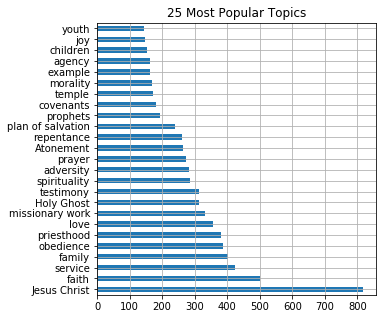

In [78]:
fig = plt.figure(figsize=(5,5))
tsum.iloc[:25].plot(kind='barh')
plt.grid()
plt.title('25 Most Popular Topics')
plt.show()

In [26]:
tsum.tail(25)

creativity             1.0
stress                 1.0
spiritual gifts        1.0
humor                  1.0
Harold B. Lee          1.0
Thomas S. Monson       1.0
spirit world           1.0
holidays               1.0
holy land              1.0
traditions             1.0
confirmation           1.0
Church leadership      1.0
young single adults    1.0
mental illness         1.0
young adults           1.0
literature             1.0
convert retention      1.0
mental health          1.0
animals                1.0
Christmas              1.0
Church activity        1.0
depression             1.0
environment            1.0
modesty                1.0
knowledge              1.0
dtype: float64

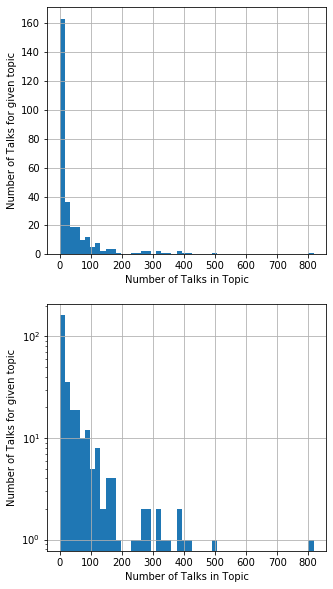

In [37]:
fig,ax = plt.subplots(2,1,figsize=(5,10))
tsum.hist(bins=50,ax=ax[0])
# plt.title('Histogram ')
ax[0].set_xlabel('Number of Talks in Topic')
ax[0].set_ylabel('Number of Talks for given topic')

tsum.hist(bins=50,ax=ax[1])
# plt.title('Histogram ')
ax[1].set_xlabel('Number of Talks in Topic')
ax[1].set_ylabel('Number of Talks for given topic')
ax[1].set_yscale('log')
plt.show()

In [79]:
# visual for initial exploration

In [84]:
os.mkdir('../figures')

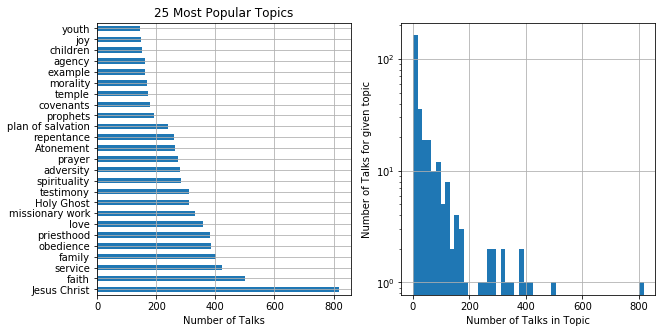

In [87]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
tsum.iloc[:25].plot(kind='barh',ax=ax[0])
ax[0].grid()
ax[0].set_title('25 Most Popular Topics')
ax[0].set_xlabel('Number of Talks')

tsum.hist(bins=50,ax=ax[1])
# plt.title('Histogram ')
ax[1].set_xlabel('Number of Talks in Topic')
ax[1].set_ylabel('Number of Talks for given topic')
ax[1].set_yscale('log')

# plt.savefig('../figures/most_popular_talks.png',dpi=300)
plt.show()

# are temples and temple separate topics for good reason? Do they have the same talks

In [63]:
temples = t.loc[t['temples'] == 1]
temples.shape

(173, 327)

In [64]:
temple = t.loc[t['temple'] == 1]
temple.shape

(173, 327)

In [66]:
temple['Title'].equals(temples['Title'])

True

# what are elder Holland's favorite talks
- have to merge this with the summary csv

In [47]:
def cols():
    l = [x for x in t.columns]
    print(l)
    pass

In [60]:
cols()

['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'topic_lists', 'Title', 'Year', 'Month', 'Aaronic Priesthood', 'Adam and Eve', 'Articles of Faith', 'Atonement', 'Bible', 'Book of Mormon', 'Brigham Young', 'Christianity', 'Christmas', 'Church activity', 'Church attendance', 'Church callings', 'Church doctrine', 'Church growth', 'Church history', 'Church leaders', 'Church leadership', 'Church meetings', 'Church membership', 'Church organization', 'Creation', 'Doctrine and Covenants', 'Easter', 'Ezra Taft Benson', 'Fall', 'First Presidency', 'First Vision', 'God the Father', 'Godhead', 'Gordon B. Hinckley', 'Harold B. Lee', 'Heavenly Father', 'Holy Ghost', 'Howard W. Hunter', 'Jesus Christ', 'Joseph Smith', 'Light of Christ', 'Melchizedek Priesthood', 'Native Americans', 'New Testament', 'Passover', 'Primary', 'Quorum of the Twelve Apostles', 'Quorums of Seventy', 'Relief Society', 'Restoration'